$S$: Susceptibles

$I$: Infectives

$R$: Recovered with Immunity

$\beta$: Contact Rate

$\mu$: Average Death Rate

$B$: Average Birth Rate

$\frac{1}{\epsilon}$: Average Latent Period

$\frac{1}{\gamma}$: Average infectious period

$R_0$: Basic Reporoduction Number

$N$: Total Population


$$\frac{dS}{dt} = (1-ep) \mu N_{unvaccinated \ births} - \beta IS_{infections} - \mu S_{deaths}$$

$$\frac{dV}{dt} = ep \mu N_{vaccinated births} - \mu V_{deaths}$$

$$\frac{dI}{dt} = \beta IS_{infections} - \gamma I_{recoveries} - \mu I_{deaths}$$

$$\frac{dR}{dt} = \gamma I_{recoveries} - \mu R_{deaths}$$

where p is a fraction of the newly born individuals that are vaccinated at birth

the vaccination takes in a fraction e of the vaccinated individuals and protects them for an average period $\frac{1}{\omega}$ years

In [106]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#Statistics from cia world factbook

#e = .1
#p = .75 
#mu = .00815
mu = .02
#N = 321368864 #As of Jul 2015 estimate
beta = .002
gamma = .5

S0 = 100
V0 = 50
I0 = 75
R0 = 10

N = S0 + I0 + R0 + V0

#S[i] = (1-e*p)*mu*N - beta*I[i-1]*S[i-1] - mu*S[i-1]
#V[i] = e*p*mu*N - mu*V[i-1]
#I[i] = beta*I[i-1]*S[i-1] - gamma*I[i-1] - mu*I[i-1]
#R[i] = gamma*I[i-1] - mu*R[i-1]

In [107]:
def f(u):
    
    S = u[0]
    V = u[1]
    I = u[2]
    R = u[3]
    
    return numpy.array([(1-e*p)*mu*N - beta*I*S - mu*S,
                       e*p*mu*N - mu*V,
                       beta*I*S - gamma*I - mu*I,
                       gamma*I - mu*R])

In [108]:
print(322*.33*.002)
print(gamma*.33)
print(mu*.33)

0.21252000000000001
0.165
0.006600000000000001


In [109]:
def euler_step(u, f, dt):
    return u + dt * f(u)

In [110]:
T = 365
dt = 1
N = int(T/dt)+1
t = numpy.linspace(0, T, N)

u = numpy.zeros((N,4))
u[0] = [S0, V0, I0, R0]

for n in range(N-1):
    u[n+1] = euler_step(u[n], f, dt)
    print(numpy.array([u[n+1,0],u[n+1,1] ,u[n+1,2] ,u[n+1,3] ]))


[ 89.771  49.549  51.     47.3  ]
[ 85.589938  49.10702   33.636642  71.854   ]
[ 84.89122303  48.6738796   21.90350437  87.235241  ]
[ 86.24556802  48.24940201  14.23251264  96.44228836]
[  88.83667439   47.83341397    9.28658834  101.62969892]
[  92.18096165   47.42574569    6.10754166  104.24039911]
[  95.98234429   47.02623077    4.05761812  105.20936196]
[ 100.05477801   46.63470616    2.7265761   105.13398378]
[ 104.27906851   46.25101204    1.85437046  104.39459215]
[ 108.5777431    45.8749918     1.27684187  103.23388554]
[ 112.89991502   45.50649196    0.89015731  101.80762876]
[ 117.21191935   45.14536212    0.62827288  100.21655484]
[ 121.49139882   44.79145488    0.44885312   98.52636019]
[ 125.72350726   44.44462578    0.32451309   96.78025954]
[ 129.89843926   44.10473326    0.23736413   95.0069109 ]
[ 134.00980402   43.7716386     0.17560124   93.22545474]
[  1.38053543e+02   4.34452058e+01   1.31353172e-01   9.14487463e+01]
[  1.42027205e+02   4.31253017e+01   9.9317064

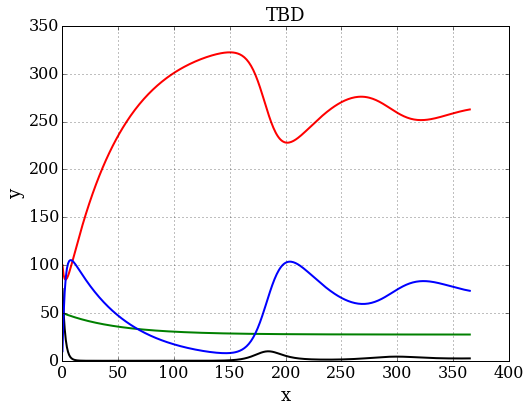

In [111]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('TBD', fontsize=18)
pyplot.plot(t,u[:,0], color= 'red', lw=2);
pyplot.plot(t,u[:,1], color='green', lw=2);
pyplot.plot(t,u[:,2], color='black', lw=2);
pyplot.plot(t,u[:,3], color='blue', lw=2);

In [112]:
from ipywidgets import interact

Project Structure

-Introduction of problem
-Latex equations and derivations
-Initial Code
-Same code with varied parameters
-Introduction of python widgets
-Install instructions
-Code implementation
-Final graph with fully functioning widgets!
-Stylesheet



In [113]:
def z(x):
    print(x)
interact(Z, x=True)
interact(Z, x=10)



NameError: name 'Z' is not defined

In [120]:
def initialConditions(x, y):
    p = x
    e = y
    return p, e

print(p, e)

def plotLines():
    #print(p)
    
    print(p)
    T = 365
    dt = 1
    N = int(T/dt)+1
    t = numpy.linspace(0, T, N)

    u = numpy.zeros((N,4))
    u[0] = [S0, V0, I0, R0]

    for n in range(N-1):
        u[n+1] = euler_step(u[n], f, dt)
        
    pyplot.figure(figsize=(8,6))
    pyplot.grid(True)
    pyplot.xlabel(r'x', fontsize=18)
    pyplot.ylabel(r'y', fontsize=18)
    pyplot.title('TBD', fontsize=18)
    pyplot.plot(t,u[:,0], color= 'red', lw=2);
    pyplot.plot(t,u[:,1], color='green', lw=2);
    pyplot.plot(t,u[:,2], color='black', lw=2);
    pyplot.plot(t,u[:,3], color='blue', lw=2);
    pyplot.show();

0.75 0.1


In [121]:
interact(initialConditions, x = (0,1,0.05), y=(0,1,0.05))

(0.45, 0.15)

0.75


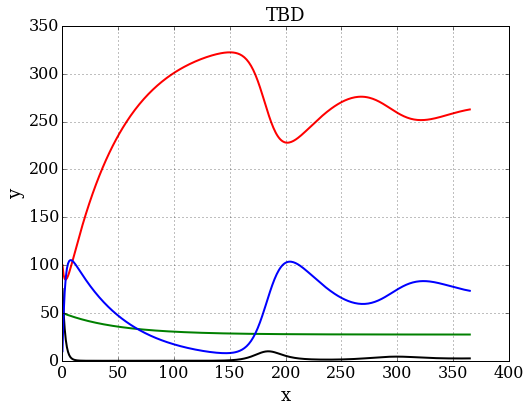

In [122]:
plotLines()